# Download Music Imagery Dataset
The imagery dataset can be downloaded from dryad or from the CNSP workshop's resources:
https://cnspworkshop.net/resources.html

The dataset is the same, but the formatting between dryad and CNSP is different.
The CNSP dataset is formatted as continuous-event Neural Data data format (and should include a channel map?)

In [1]:
if 0: # set to 1 to attempt downloading the dataset from CNSP server (may not work on-campus)
    !wget https://www.data.cnspworkshop.net/data/datasetCND_musicImagery.zip -O data/datasetCND_musicImagery.zip

If the above link is unreachable (possibly on school network), grab a clone hosted on google drive:

(code from https://linux.tips/tutorials/download-large-google-drive-files-with-wget-in-terminal)

In [2]:
if 0: # set to 1 to attempt downloading the dataset from google drive clone
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1PgsWiJ3kQsjvV2TcvM2gC_uWI_o6ecp4' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1PgsWiJ3kQsjvV2TcvM2gC_uWI_o6ecp4" -O datasetCND_musicImagery.zip && rm -rf /tmp/cookies.txt

This saves the file to the repo's root directory.
We could make a data folder and unzip the data there:

In [3]:
if 0:
    !mkdir data
    !mv datasetCND_musicImagery.zip data/
    !unzip data/datasetCND_musicImagery.zip -d data

Make a list of all the files in the dataset:

In [4]:
from glob import glob
datafiles = glob('data/musicImagery/**', recursive=True)
for filename in datafiles:
    print(filename)

data/musicImagery/
data/musicImagery/dataCND
data/musicImagery/dataCND/dataSub18.mat
data/musicImagery/dataCND/dataSub11.mat
data/musicImagery/dataCND/dataSub16.mat
data/musicImagery/dataCND/dataSub9.mat
data/musicImagery/dataCND/dataSub7.mat
data/musicImagery/dataCND/dataSub6.mat
data/musicImagery/dataCND/dataSub1.mat
data/musicImagery/dataCND/dataSub8.mat
data/musicImagery/dataCND/dataSub17.mat
data/musicImagery/dataCND/dataSub10.mat
data/musicImagery/dataCND/dataSub19.mat
data/musicImagery/dataCND/dataSub2.mat
data/musicImagery/dataCND/dataSub5.mat
data/musicImagery/dataCND/dataSub21.mat
data/musicImagery/dataCND/dataSub13.mat
data/musicImagery/dataCND/dataSub14.mat
data/musicImagery/dataCND/dataSub15.mat
data/musicImagery/dataCND/dataSub12.mat
data/musicImagery/dataCND/dataStim.mat
data/musicImagery/dataCND/dataSub20.mat
data/musicImagery/dataCND/dataSub4.mat
data/musicImagery/dataCND/dataSub3.mat
data/musicImagery/LICENSE
data/musicImagery/readme.txt
data/musicImagery/stimuli
data

# Import the input stimulus

In [5]:
from scipy.io import loadmat
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html

import matplotlib.pyplot as plt
import numpy as np

In [6]:
stim_mat = loadmat(r"data/musicImagery/dataCND/dataStim.mat", 
                   simplify_cells = True, # trying this as the struct here is complicated
                   squeeze_me = True
                  ) 
stim = stim_mat['stim']
print(stim.keys())
# How do we read stim? Its an empty-shaped array...

dict_keys(['stimIdxs', 'condIdxs', 'condNames', 'data', 'names', 'fs'])


## Print shapes of all stim array entries

In [7]:
stimIdxs = stim['stimIdxs']
print(f'stimIdxs shape: {stimIdxs.shape}')

condIdxs = stim['condIdxs']
print(f'condIdxs shape: {condIdxs.shape}')

condNames = stim['condNames']
print(f'condNames shape: {condNames.shape}')

data = stim['data']
print(f'data shape: {data.shape}')

names = stim['names']
print(f'names shape: {names.shape}')

fs = stim['fs']
print(f'fs: {fs}')

stimIdxs shape: (88,)
condIdxs shape: (88,)
condNames shape: (2,)
data shape: (2, 88)
names shape: (2,)
fs: 64


## Print stim entries themselves

In [8]:
print(stimIdxs)
print(condIdxs)
print(condNames)
print(names)

[1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 4]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['Listening' 'Imagery']
['Acoustic Envelope' 'Expectation Vector']


## Identify unique conditions (2) and songs (4)

In [9]:
condList = np.unique(condIdxs)
print(f'Unique Conditions: {condList}')

songList = np.unique(stimIdxs)
print(f'Unique Songs: {songList}')

Unique Conditions: [1 2]
Unique Songs: [1 2 3 4]


## Collect data idxs by condition and song

In [10]:
idxs = {} # dict to store idxs for each condition and stim/song idx

for cond in condList: # two conditions
    condName = condNames[cond-1] # MATLAB indexes from 1...
    idxs[condName] = {}
    
    for song in songList:
        
        print(f'{condNames[cond-1]}: Song {song}: Indices:') 
        matched_ndx = np.where(
            (stimIdxs == song) & (condIdxs == cond)
            )[0]
        print(matched_ndx)
        
        idxs[condName][song] = matched_ndx

Listening: Song 1: Indices:
[ 0  1  2  3  4  5  6  7  8  9 10]
Listening: Song 2: Indices:
[11 12 13 14 15 16 17 18 19 20 21]
Listening: Song 3: Indices:
[22 23 24 25 26 27 28 29 30 31 32]
Listening: Song 4: Indices:
[33 34 35 36 37 38 39 40 41 42 43]
Imagery: Song 1: Indices:
[44 45 46 47 48 49 50 51 52 53 54]
Imagery: Song 2: Indices:
[55 56 57 58 59 60 61 62 63 64 65]
Imagery: Song 3: Indices:
[66 67 68 69 70 71 72 73 74 75 76]
Imagery: Song 4: Indices:
[77 78 79 80 81 82 83 84 85 86 87]


## Plot acustic envelope and expectations for one song

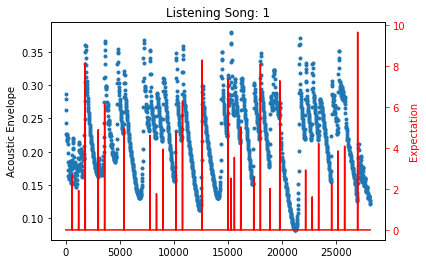

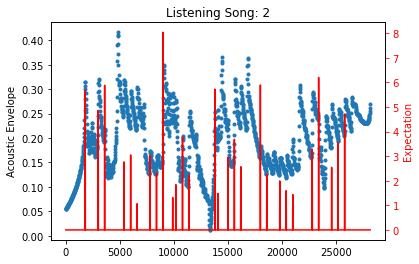

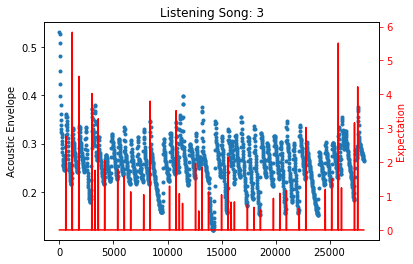

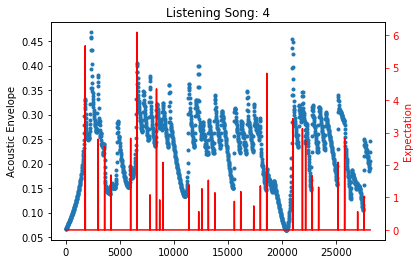

In [11]:
cond = 'Listening' # 'Listening' or 'Imagery'
trial = 0 # 0 to 10

for song in songList: # 1, 2, 3, 4

    envs = data[0][idxs[cond][song][trial]]
    exps = data[1][idxs[cond][song][trial]]

    tt_ms = 1000 * np.arange(start=0, stop=len(exps)/fs, step=1/fs)
    
    # Plot the acoustic envelope
    fig, ax_env = plt.subplots()
    ax_env.plot(tt_ms, envs, '.')
    ax_env.set_ylabel('Acoustic Envelope')

    # Plot the expectations vector
    ax_exp = ax_env.twinx()
    ax_exp.plot(tt_ms, exps, 'r')
    ax_exp.tick_params(axis='y', colors='red')
    ax_exp.yaxis.label.set_color('r')
    ax_exp.set_ylabel('Expectation')

    plt.xlabel('Time [ms]')
    # plt.xlim([0, 30000])
    plt.title(f'{cond} Song: {song}')
    plt.show()

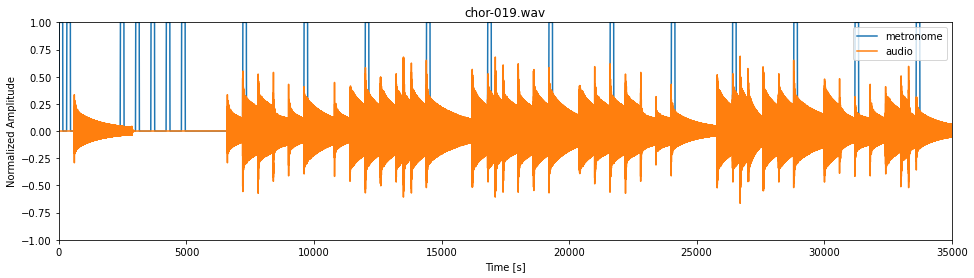

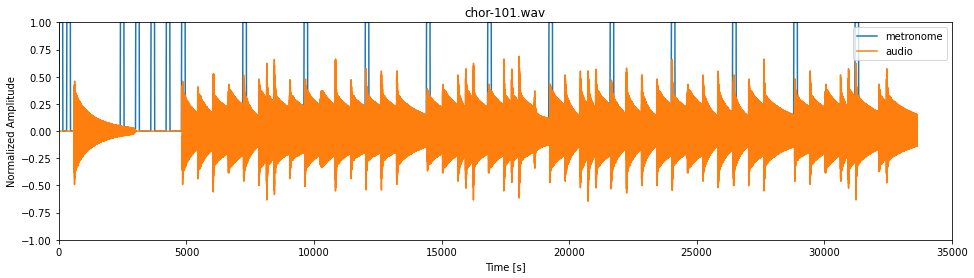

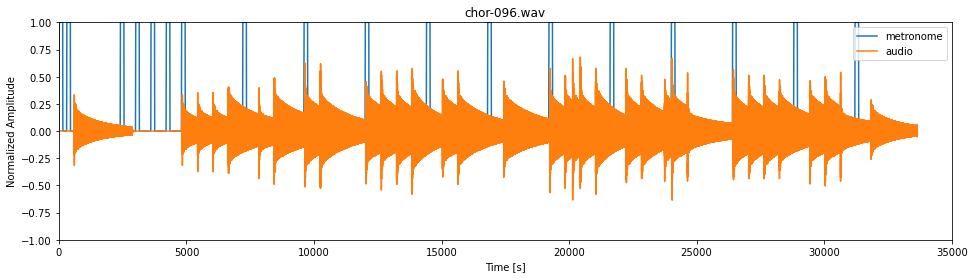

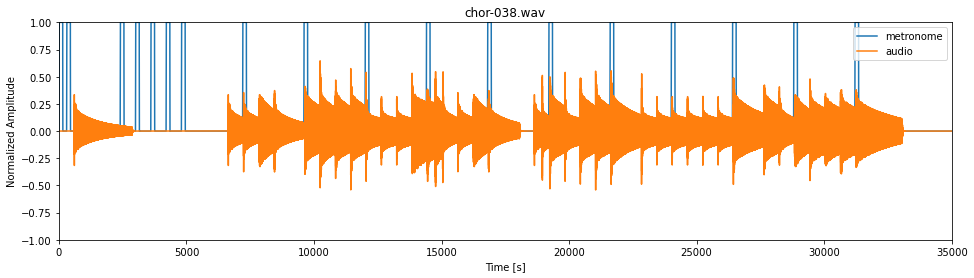

In [13]:
from scipy.io import wavfile

MAX_16_BIT = 2**(16-1)
waves = glob('data/musicImagery/**/*.wav', recursive=True)
# print(waves)

stim_waves = {}

for wav in waves:
    wav_name = wav.split('/')[-1]
    
    fs_wav_Hz, wav_data = wavfile.read(wav)
    num_samples, num_chans = wav_data.shape
    
    stim_waves[wav_name] = {}
    
    stim_waves[wav_name]['time'] = 1000 * np.arange(
        start=0, 
        stop=num_samples/fs_wav_Hz, 
        step=1/fs_wav_Hz)
    
    stim_waves[wav_name]['audio'] = wav_data[:, 1] / MAX_16_BIT
    
    stim_waves[wav_name]['metronome'] = wav_data[:, 0] / MAX_16_BIT

    plt.figure(figsize=(16,4))
    plt.plot(
        stim_waves[wav_name]['time'], 
        stim_waves[wav_name]['metronome'], 
        label='metronome'
    )
    
    plt.plot(
        stim_waves[wav_name]['time'], 
        stim_waves[wav_name]['audio'], 
        label='audio')
        
    plt.title(wav_name)
    plt.xlim([0, 35 * 1e3])b
    plt.ylim([-1, 1])
    plt.xlabel('Time [s]')
    plt.ylabel('Normalized Amplitude')
    plt.legend(loc='upper right')


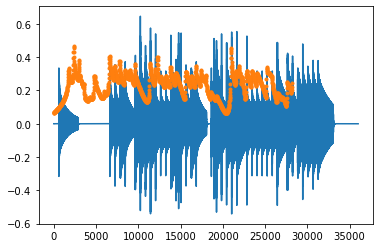

In [14]:
plt.plot(stim_waves[wav_name]['time'], stim_waves[wav_name]['audio'], label='audio')
plt.plot(tt_ms, envs, '.')

[   3307    6622    6624 ... 1587585 1587588 1587593]
[ True False False ... False False False]
[   6622   16537   19846  109147  112456  135607  138918  162067  165390
  188527  191838  214987  218299  320827  324141  426667  429983  532507
  535818  638347  641658  744187  747500  850027  853340  955867  959181
 1061707 1065020 1167547 1170862 1273387 1276698 1379227 1382544]


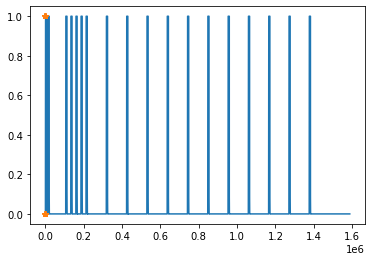

In [39]:
from scipy import signal
peaks = signal.find_peaks(stim_waves[wav_name]['metronome'])[0]
print(peaks)

print(np.diff(peaks) > 100)

metronome_onsets = peaks[1:][np.diff(peaks) > 100]
print(metronome_onsets)

plt.plot(stim_waves[wav_name]['metronome'])
plt.plot(stim_waves[wav_name]['metronome'][metronome_onsets], '*')
# plt.plot(peaks)